# Binary Classification
## Load Data

In [28]:

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Prepare Data
The lists of integers have different lengths, we should turn the lists into tensors.
Two options:
- Pad lists to turn them into an tensor of shape (samples, max_length)
- Multi-hot encode into 0s and 1s

### Multi-hot Encode

In [29]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0].shape)

(10000,)


In [30]:
# vectorize lables
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


## Build Model

Input data is vectors, the labels are scalars => **Dense** layers with *relu* activications.

We build NN with 3 Dense layers, 16 units for the hidden layers.

relu: zero out negative values
sigmoid: squashes arbitary values into [0, 1] interval

In [31]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Choose loss function and optimizer:
Because we are solving a **binary classification** problem, and the output is the probability, it's best to use the *binary_crossentropy* loss. And *rmsprop* is usually a good default choice for virtually any problem.

In [32]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

## Validate model

In [33]:
x_val = x_train[:10000] # validation set
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train model for 20 epochs with mini-batch of 512 samples.

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5075 - accuracy: 0.7923 - val_loss: 0.3794 - val_accuracy: 0.8743
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3054 - accuracy: 0.9021 - val_loss: 0.3165 - val_accuracy: 0.8780
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2289 - accuracy: 0.9263 - val_loss: 0.3090 - val_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1795 - accuracy: 0.9432 - val_loss: 0.2808 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1470 - accuracy: 0.9531 - val_loss: 0.3168 - val_accuracy: 0.8726
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1218 - accuracy: 0.9625 - val_loss: 0.2884 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1060 - accuracy: 0.9676 - val_loss: 0.3031 - val_accuracy: 0.8832
Epoch 8/20
30

Display training result with plot

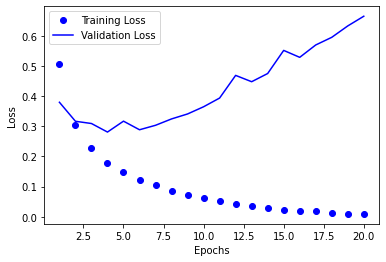

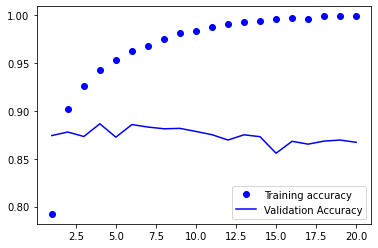

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.legend()
plt.show()

# Multiclass Classification
## Load Data

In [36]:
from tensorflow.keras.datasets import reuters
# 8982 train, 2246 test
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


## Prepare Data

In [38]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Encode labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

# keras has built-in way to do this
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

## Build Model

The dimensionality is larger then binary classification, and we should use larger layers than before to avoid lossing information.

In [40]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # distribute probability into 46 classes, sum up to 1
])



We will use *categorical_crossentropy* as loss function: it measures the distance between two distributions - output by our model and the true distribution of the labels

In [43]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Validate Model
same with binary classfication.

In [46]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.6361 - accuracy: 0.5302 - val_loss: 1.7698 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4200 - accuracy: 0.7116 - val_loss: 1.3279 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0398 - accuracy: 0.7781 - val_loss: 1.1161 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8161 - accuracy: 0.8269 - val_loss: 1.0108 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6487 - accuracy: 0.8661 - val_loss: 0.9536 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5174 - accuracy: 0.8911 - val_loss: 0.9574 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4163 - accuracy: 0.9121 - val_loss: 0.9058 - val_accuracy: 0.8180
Epoch 8/20
16

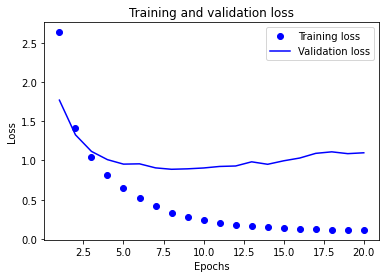

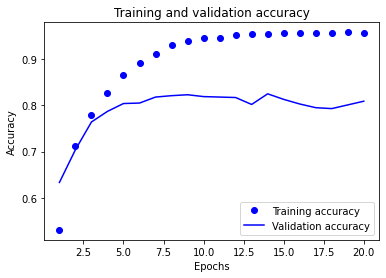

In [47]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Predicting House Prices: Regression Example

In [50]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_tagets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


## Prepare Data

Feature are in different ranges - featuere-wise normalization (substract mean and divide by standard deriviation)

In [51]:
mean = np.mean(train_data, axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std # here we use the training set's mean and std, we should NEVER use test data in computation

## Build Model

In [59]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

## Validate Model with K-fold Validation

In [63]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_tagets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_tagets[:i * num_val_samples],
         train_tagets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


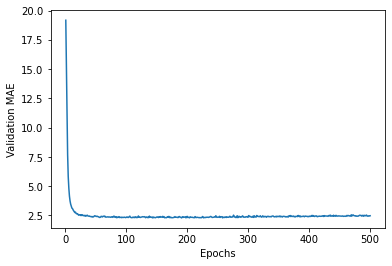

In [71]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()